# Main Goals:
1. Make sure columns are the appropriate data type
2. Identify columns with any null values or duplicated values
3. Remove columns that I believe are not necessary for analysis
4. Check for linearity using correlation coeafficients
5. Remove outliers
6. Checck for normality using qq plot and distplot
7. Select features for modeling
8. One hot encode anything that needs to be

# Data Overview

In [105]:
# import any necessary libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [106]:
# Load dataset and view contents
king = pd.read_csv("../data/kc_house_data.csv")
king.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520


In [107]:
# View the columns in the king dataframe
king.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [108]:
# View datatypes in each column 
king.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

**Observations:**
1. date, yr_built, yr_renovated should be in datetime format

# Deal with Duplicates and Null values

In [109]:
# Look at the unique identifier column and see if every record is a unique home 
print(king['id'].nunique())
#get sum of duplicates
king['id'].duplicated().sum()

30154


1

It seems that there is only 1 duplicate record so now lets drop that record.

In [110]:
#drop duplicates and only keep the most current data
king = king.sort_values('id').drop_duplicates(subset = 'id', keep = 'first')

#get sum of duplicates
king['id'].duplicated().sum()

0

Now that duplicates have been removed lets start removing any null values or missing values. 

In [111]:
#check for null values
king.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [112]:
# Just based off know the size of the dataset 32 values max is a very small percentage of data. It would be appropriate to drop the rows. 
king.dropna(axis=0, inplace=True)

#check for null values to make sure
king.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [113]:
# Since we sorted it already and took care of the duplicates lets drop our identifiers column since it is no longer needed.
king.drop(labels='id', axis=1, inplace=True)

# Correct datatypes 

In [114]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 21177 to 26110
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30110 non-null  object 
 1   price          30110 non-null  float64
 2   bedrooms       30110 non-null  int64  
 3   bathrooms      30110 non-null  float64
 4   sqft_living    30110 non-null  int64  
 5   sqft_lot       30110 non-null  int64  
 6   floors         30110 non-null  float64
 7   waterfront     30110 non-null  object 
 8   greenbelt      30110 non-null  object 
 9   nuisance       30110 non-null  object 
 10  view           30110 non-null  object 
 11  condition      30110 non-null  object 
 12  grade          30110 non-null  object 
 13  heat_source    30110 non-null  object 
 14  sewer_system   30110 non-null  object 
 15  sqft_above     30110 non-null  int64  
 16  sqft_basement  30110 non-null  int64  
 17  sqft_garage    30110 non-null  int64  
 18  sq

Lets begin by converting the columns date, yr_built, yr_renovated into datetime format.

In [115]:
import datetime

# Check if the columns are in datetime format
subset = ["date", "yr_built", "yr_renovated"]

for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

False
False
False


Now that we made sure they are not in datetime format lets convert them to date format.

In [116]:
# State columns desired for datetime format
subset = ["date", "yr_built", "yr_renovated"]

for col in subset:
    king[col] = pd.to_datetime(king[col])

# Check if for loop worked correctly
for col in subset:
    x = isinstance(king[col][0], datetime.date)
    print(x)

True
True
True


Another data column that is incorrect should be grade. It is a categorical variable however can't be interpreted since it is a string. However we can extract the associated number since it is included. 

In [117]:
king['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3803
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [119]:
# Define the regular expression pattern to extract the number and word separately
pattern = r'(\d+)\s(.+)'

# Use str.extract() to extract the number and word and create new columns
king[['extracted_grade_num', 'extracted_class']] = king['grade'].str.extract(pattern)

# Convert the 'extracted_number' column to integers
king['extracted_grade_num'] = king['extracted_grade_num'].astype(int)

In [120]:
king.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,extracted_grade_num,extracted_class
21177,2021-10-20,248448.0,3,1.5,1790,39808,1.0,NO,NO,NO,...,0,460,290,1970-01-01 00:00:00.000001958,1970-01-01,"1526 I Street Northeast, Auburn, Washington 98...",47.32178,-122.21875,7,Average
10844,2022-04-05,609000.0,4,1.5,2232,12866,1.5,NO,NO,NO,...,0,440,60,1970-01-01 00:00:00.000001934,1970-01-01,"1412 I Street Northeast, Auburn, Washington 98...",47.32083,-122.21874,7,Average
9292,2022-05-26,1020000.0,5,2.0,2760,15156,1.0,NO,NO,NO,...,1380,0,0,1970-01-01 00:00:00.000001954,1970-01-01,"1104 Southwest Shorebrook Drive, Normandy Park...",47.44375,-122.34868,8,Good


# Exploratory Data Analysis

### Determine Linearity between variables

Determine Linerity Visually first between variables

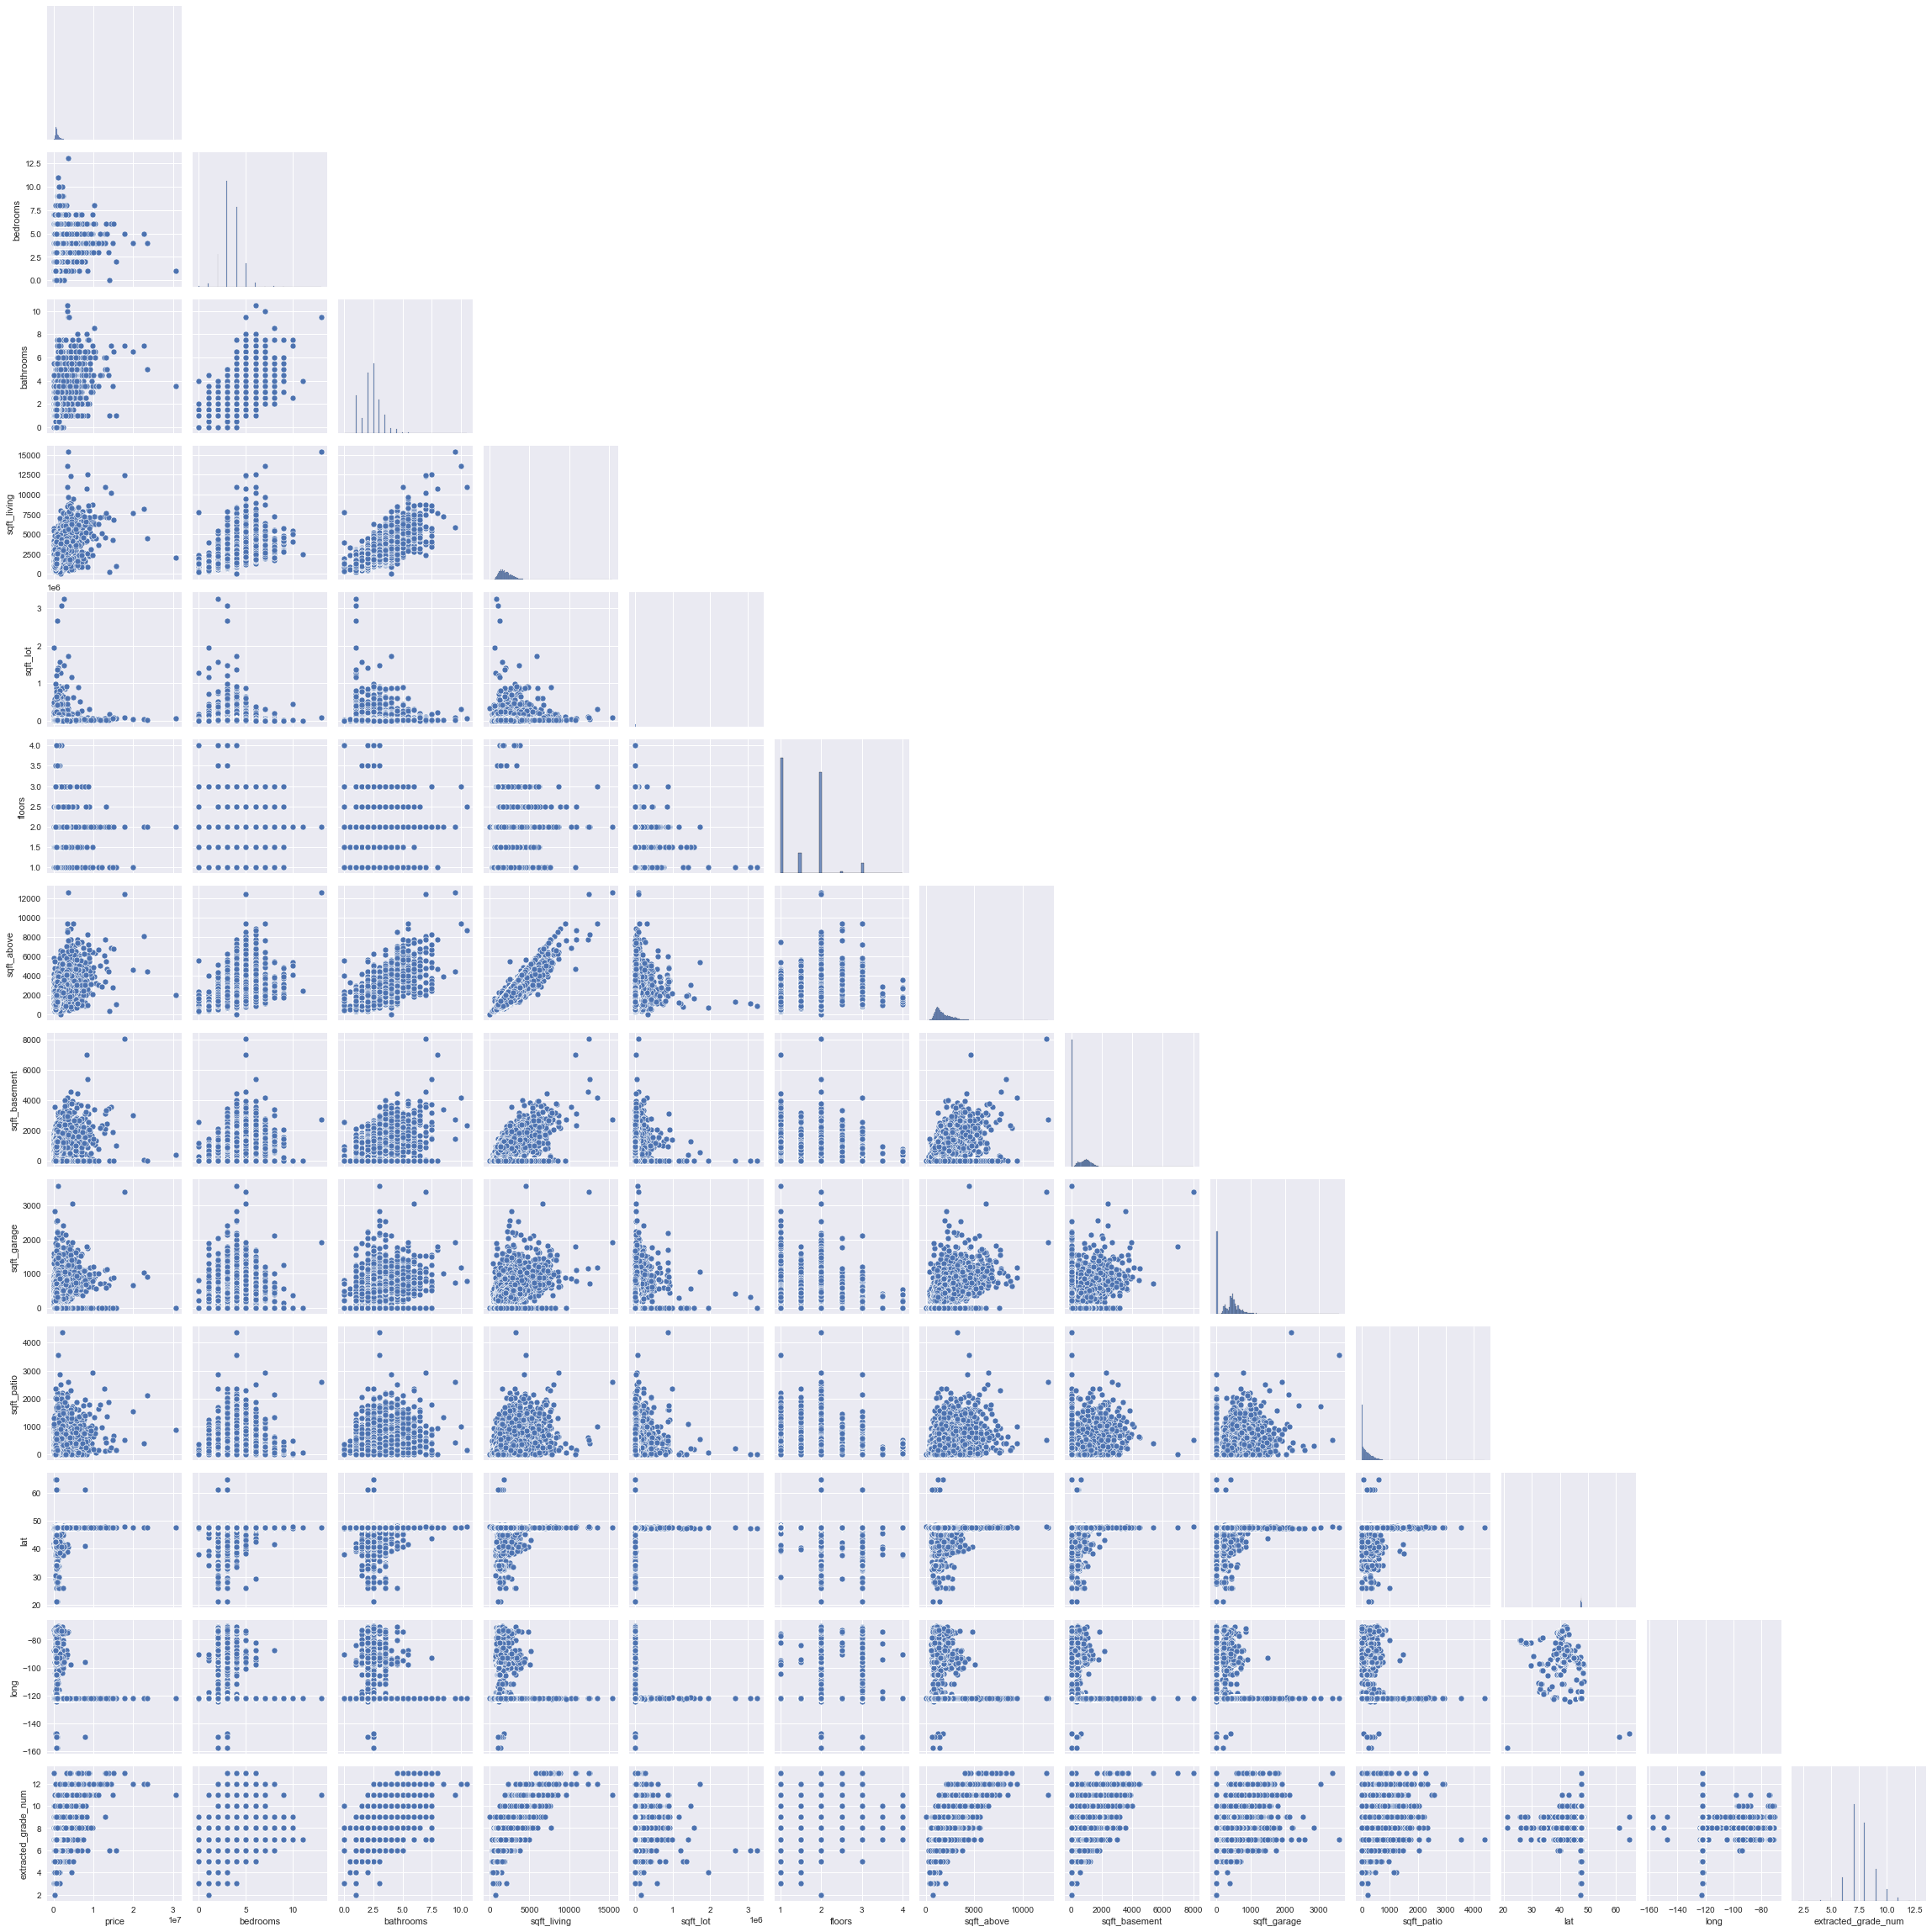

In [121]:
# Create a scatter plot matrix using seaborn
sns.pairplot(king, diag_kind='hist', corner=True)

**Observations:**
There is some degree of linearity for the following pairs that I think contribute most to a homes value:
* 'price vs sqft_above', 'price vs sqft_living', 'price vs bathrooms', 'price vs bedrooms'
* 'sqft_living vs sqft_above'

We have two types of data in this dataset. There are categorical variables and continuous variables. Based off the descriptions and viewing the descriptions the following conclusion can be made:
1. continuous variables = price, sqft_living, sqft_lot, sqft_above, sqft_basement
2. categorical variables = bedrooms, bathrooms, floors, waterfront, condition, grade

That being said lets split our data to view how they behave in respect to price which is our target variable. 

In [36]:
# split data into 2 groups of type continous and type categoricals.
# Add price to both groups to view correlations in respect to price.
continuous = ['price', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement']
categoricals = ['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'extracted_grade_num']

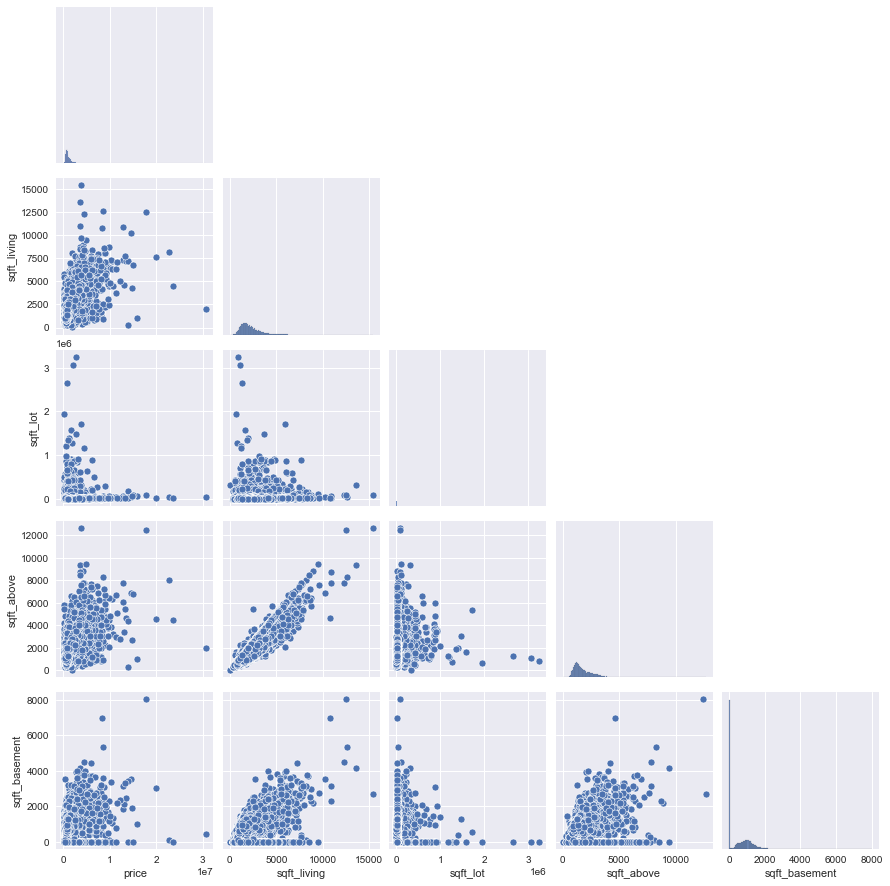

In [122]:
# Create a scatter plot matrix for continuous values using seaborn
sns.pairplot(king[continuous], diag_kind='hist', corner=True)

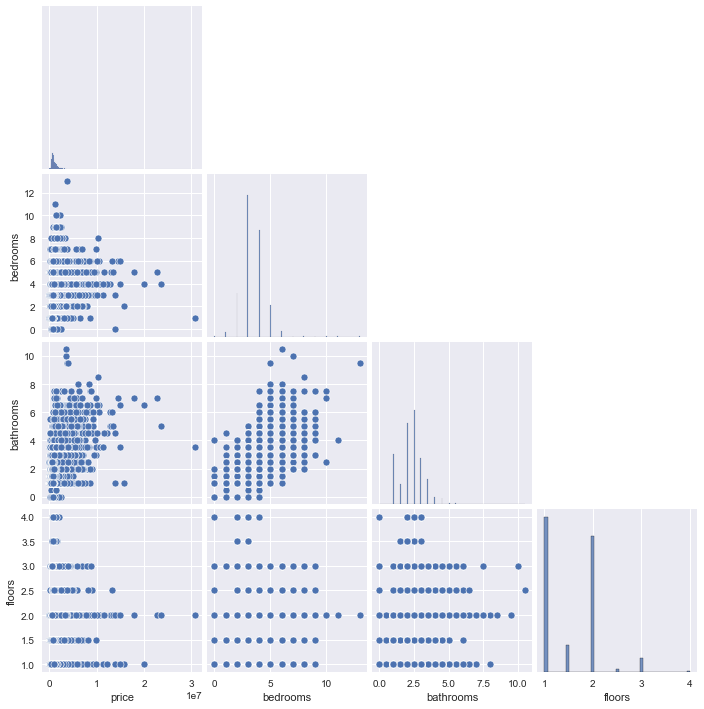

In [123]:
# Create a scatter plot matrix for categorical values using seaborn
sns.pairplot(king[categoricals], diag_kind = 'hist', corner = True)


View correlations matrix with respect to price

In [124]:
king.corr()['price']

price                  1.000000
bedrooms               0.288992
bathrooms              0.480284
sqft_living            0.608586
sqft_lot               0.086562
floors                 0.180555
sqft_above             0.538614
sqft_basement          0.244938
sqft_garage            0.263655
sqft_patio             0.313787
lat                    0.063419
long                  -0.022271
extracted_grade_num    0.566508
Name: price, dtype: float64

# Factors to consider for each feature of a Home
We are looking at linearity of a feature with respect to 'price'. We should consider the following factors:

### **Skweness**
Skweness measure the symmetry in the data's distribution.
* If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
* If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed.
* If the skewness is less than -1 or greater than 1, the data are highly skewed.

### **Kurtosis**
Kurtosis determines the heaviness of the distribution tails. 
* If the is leptokurtic (Kurtosis > 3), the values in a leptokurtic distribution are near the mean.
* A platykurtic(Kurtosis <3) distribution has the values further away from the mean and appears flattened.
* Mesokurtic(Kurtosis=3) distribution is looks like a normal distribution.
* High kurtosis = the data has heavy outliers.
* Low kurtosis = the data has lack of outliers.

### **Pearson correlation**
* A value = 0 suggets no correlation between variables.
* A value closer to 0 implies weaker correlation between variables.
* A value closer to 1 implies stronger positive correlation between variables.
* A value closer to -1 implies stronger negative correlation between variables.

# What factors increases the value of a Home?
### Target Variable : Price